In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
price = pd.read_csv("D:/DA2210R1/data/house_price_Dống-Da_Hà-Nội_subdata.csv")

In [3]:
price.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo


In [4]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


### Yêu cầu vẽ biểu đồ kết hợp để:
Phân tích mối liên hệ giữa diện tích với giá nhà. Đồng thời, giữa số phòng ngủ với giá nhà và giữa số toilet với giá nhà.

So sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land). Đồn thời thể hiện tỉ lệ % bài đăng (bản ghi) giữa các hình thức nhà (type_of_land).

Vẽ biểu đồ thể hiện sự thay đổi giá nhà trung bình trên 1m2 theo số lượng phòng ngủ, theo số phòng toilet hoặc theo diện tích.

#### Phân tích mối liên hệ giữa diện tích với giá nhà. Đồng thời, giữa số phòng ngủ với giá nhà và giữa số toilet với giá nhà.

In [9]:
data1 = price[["area", "toilet", "bedroom", "price"]]
data1 = data1.dropna()

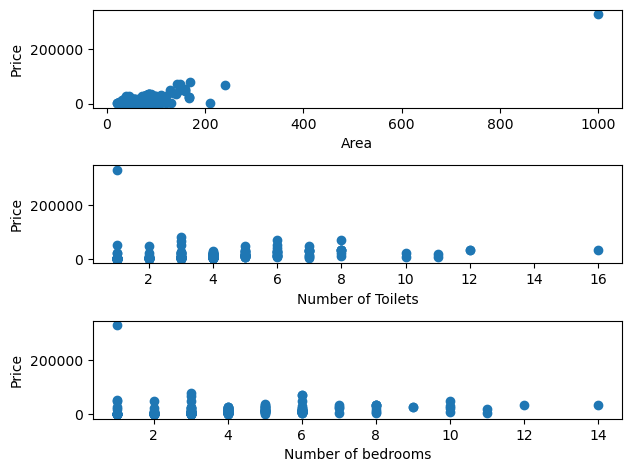

In [75]:
fig, ax = plt.subplots(3, 1)
ax[0].scatter(data1["area"], data1["price"])
ax[0].set_xlabel("Area")
ax[0].set_ylabel("Price")

ax[1].scatter(data1["toilet"], data1["price"])
ax[1].set_xlabel("Number of Toilets")
ax[1].set_ylabel("Price")

ax[2].scatter(data1["bedroom"], data1["price"])
ax[2].set_xlabel("Number of bedrooms")
ax[2].set_ylabel("Price")

fig.tight_layout(pad=1.0)
plt.show()

#### So sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land). Đồn thời thể hiện tỉ lệ % bài đăng (bản ghi) giữa các hình thức nhà (type_of_land).

In [40]:
data2 = price[["area", "price", "property_type"]]
data2 = data2.dropna()

In [41]:
data2["price/m2"] = data2["price"] / data2["area"]

In [42]:
Q1 = data2.quantile(0.25)
Q3 = data2.quantile(0.75)
IQR = Q3 - Q1
data2 = data2[~((data2 < (Q1 - 1.5*IQR)) | (data2 > (Q3 + 1.5*IQR))).any(axis=1)]

C:\Users\Luan Vo\AppData\Local\Temp\ipykernel_11128\1573293633.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data2 = data2[~((data2 < (Q1 - 1.5*IQR)) | (data2 > (Q3 + 1.5*IQR))).any(axis=1)]


In [46]:
mean_price = data2.groupby("property_type")["price/m2"].mean()

In [47]:
type_of_land = data2.groupby("property_type")["property_type"].count()

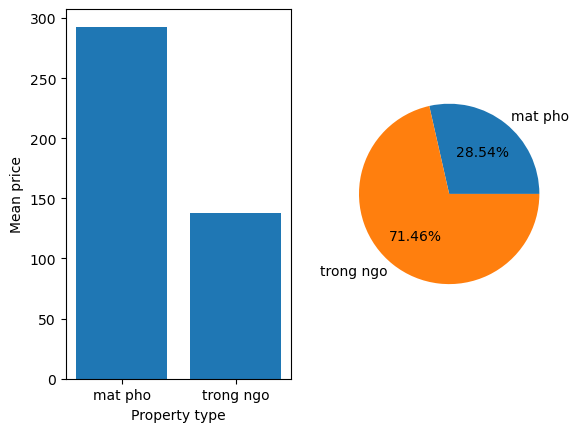

In [50]:
fig, ax = plt.subplots(1, 2)
ax[0].bar(mean_price.index, mean_price.values)
ax[0].set_xlabel("Property type")
ax[0].set_ylabel("Mean price")

ax[1].pie(type_of_land.values, labels = type_of_land.index, autopct = "%1.2f%%")
plt.show()

#### Vẽ biểu đồ thể hiện sự thay đổi giá nhà trung bình trên 1m2 theo số lượng phòng ngủ, theo số phòng toilet hoặc theo diện tích.

In [52]:
data3 = price[["bedroom", "toilet", "area", "price"]]
data3 = data3.dropna()

In [53]:
data3["price/m2"] = data3["price"] / data3["area"]

In [54]:
Q1 = data3.quantile(0.25)
Q3 = data3.quantile(0.75)
IQR = Q3 - Q1
data3 = data3[~((data3 < (Q1 - 1.5*IQR)) | (data3 > (Q3 + 1.5*IQR))).any(axis=1)]

In [59]:
price_bedroom = data3.groupby("bedroom")["price/m2"].mean()
price_toilet = data3.groupby("toilet")["price/m2"].mean()
price_area = data3.groupby("area")["price/m2"].mean()

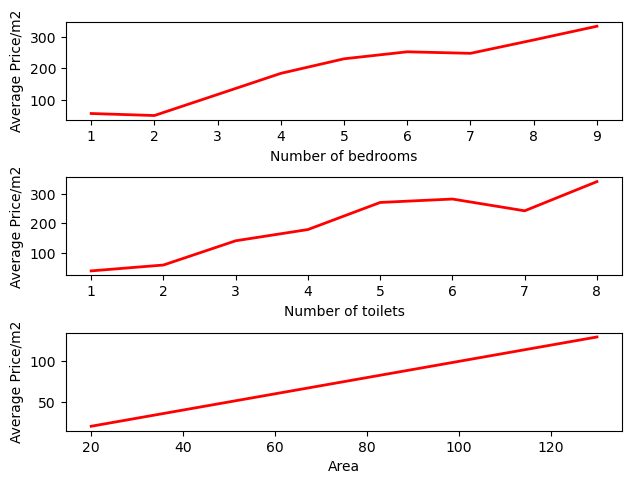

In [74]:
fig, ax = plt.subplots(3, 1)
ax[0].plot(price_bedroom.index, price_bedroom.values, linewidth = 2, c = "r")
ax[0].set_ylabel("Average Price/m2")
ax[0].set_xlabel("Number of bedrooms")

ax[1].plot(price_toilet.index, price_toilet.values, linewidth = 2, c = "r")
ax[1].set_ylabel("Average Price/m2")
ax[1].set_xlabel("Number of toilets")

ax[2].plot(price_area.index, price_area.index, linewidth = 2, c = "r")
ax[2].set_ylabel("Average Price/m2")
ax[2].set_xlabel("Area")

fig.tight_layout(pad=1.0)
plt.show()